# Chapter 6.2 Weight Initialization

가중치의 초깃값을 무엇으로 설정하느냐 - 신경망 학습의 성패를 가름

### Weight Decay
: train to minimize weight parameter

minimize weight -> minimize overfiting.
오버피팅 억제, 범용 성능을 높임

- 가중치를 작게 만들고 싶다면, 초깃값도 작은 값에서 시작하는 것이 좋다

```python
0.01 * np.random.randn(10, 100)
```

이처럼 지금까지 가중치의 초깃값: 정규분포에서 생성되는 값 * 0.01 (표준편차가 0.01인 정규 분포)

## 6.2.1 If Weight Initialization is 0

Bad Idea. The training is not getting well.

- **가중치를 균일한 값으로 설정하면 안 됨**
    - Back Propagation에서 모든 가중치의 값이 똑같이 갱신되기 때문.

Foward Propagation: 두 번째 층의 뉴런에 *모두 같은 값*이 전달됨

== BackPropagation: 두 번째 층의 가중치가 *모두 똑같이 갱신된다*는 말이 됨

--> 가중치들은 같은 초깃값에서 시작, *갱신을 거쳐도 같은 값 유지*

가중치가 고르게 생성되는 상황 막기 위해 초기값 무작위 설정

## 6.2.2 Activation Rate on Hidden Layer

가중치의 초깃값 -> 은닉층의 활성화 값(활성화 함수의 출력 데이터) 변화

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# sigmoid function as activation func

x = np.random.randn(1000, 100) # input data - 1,000 random data
node_num = 100 # n of each layer - 100
hidden_layer_size = 5 # 5 layer neural network
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 
    # * 1 -> 표준 편차가 1인 정규 분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    # store the result of the activation one to activations

목표: 분포 정도 (표준편차) 바꾸어 가며 활성화값들 분포 변화를 관찰하는 것

<function matplotlib.pyplot.show(close=None, block=None)>

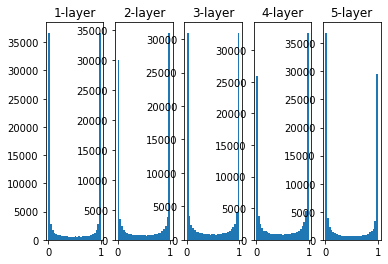

In [4]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show

각 층 활성화값 -> 0, 1에 치우쳐 분포

sigmoid function: div -> 1 (if the output -> 0 or -> 1)

데이터 0/1 치우쳐 분포 -> backpropagation gradient value 작아지다가 사라짐 -> **gradient vanishing**

<function matplotlib.pyplot.show(close=None, block=None)>

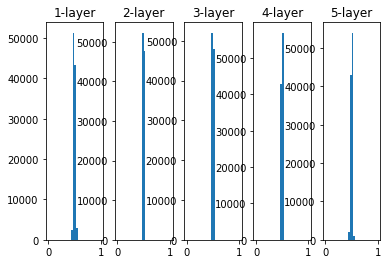

In [9]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # 표준 편차 0.01로 바꾸어 실험 반복
    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    # store the result of the activation one to activations

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show

표준편차 0.5에 집중 -> 기울기 소실 문제는 일어나지 않으나 다른 문제 발생(표현력 제한)

다수의 뉴런 같은 값 출력 -> 뉴런 여러 개 둔 의미 없어짐

**바람직한 각 층 활성화값의 분포**

- 적당히 고루 분포될 것.

- 층과 층 사이 적당하게 다양한 데이터가 흐르게 할 것.
    - 학습이 효율적으로 이루어짐

- 치우친 데이터가 흐르지 않도록 할 것.
    - 학습이 제대로 이루어지지 않음

### Using *Xavier* Initial Value

: 초깃값의 표준 편차가 *(1/n)^(1/2)* 되도록 설정

앞의 노드가 *n* 개라면, 표준 편차가 *(1/n)^(1/2)* 인 분포를 이끌면 됨

앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐

<function matplotlib.pyplot.show(close=None, block=None)>

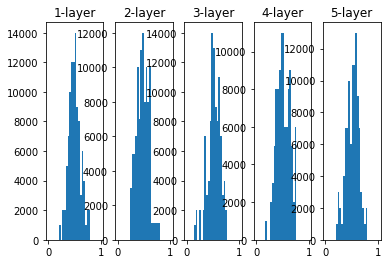

In [11]:
node_num = 100

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # Xavier 초깃값을 이용함
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    # store the result of the activation one to activations

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show

## 6.2.3 ReLU 이용할 때의 가중치 초깃값

*Xavier*: Activation Function이 Linear인 것이 전제 (Sigmoid, Tanh)
    
but, using ReLU, ReLU에 특화된 초깃값 이용하는 것 권장 - **He Initializaion**

: 초깃값의 표준 편차가 *(2/n)^(1/2)* 되도록 설정

앞의 노드가 *n* 개라면, 표준 편차가 *(2/n)^(1/2)* 인 분포를 이끌면 됨

ReLU < 0 -> 0: 더 넓게 분포시키기 위해 2배의 계수 필요

In [15]:
def ReLU(x):
    return np.maximum(0, x)

In [32]:
x = np.random.randn(1000, 100) # input data - 1,000 random data
node_num = 100 # n of each layer - 100
hidden_layer_size = 5 # 5 layer neural network
activations = {}

<function matplotlib.pyplot.show(close=None, block=None)>

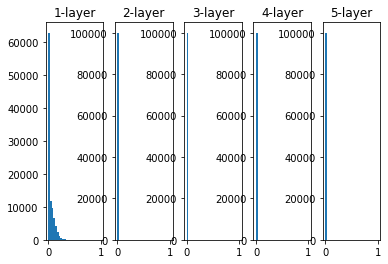

In [23]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # 표준 편차 0.01로 바꾸어 실험 반복
    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z
    # store the result of the activation one to activations

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

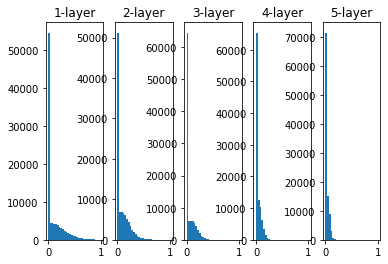

In [30]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # Xavier 초깃값을 이용함
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z
    # store the result of the activation one to activations

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

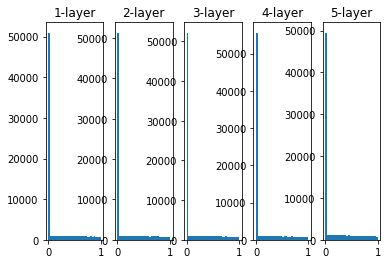

In [33]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    # Xavier 초깃값을 이용함
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z
    # store the result of the activation one to activations

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show

## 6.2.4 MNIST DATA SET - compare initial weight

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/weight_init_compare.py